In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from bs4 import BeautifulSoup
import requests

# Metadata found at https://catalog.data.gov/harvest/object/f4d6c617-cc88-49d7-a941-4c39bc57603c
data = pd.read_csv("cause_of_death.csv")

print("INITIAL LOOK AT DATA")
print("Head: " + str(data.head()))
print("Columns: " + str(data.columns))
print("Shape: " + str(data.shape), "\n")

#  Explore Years
print("CHECKING 'YEARS'")
print("Earliest year: ", data['Year'].min())
print("Most recent year: ", data['Year'].max())
print("Missing values: ", data['Year'].isna().sum())
print("Data type: ", data['Year'].dtype, "\n")

INITIAL LOOK AT DATA
Head:    Year                                     113 Cause Name      Cause Name  \
0  2012  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
1  2016  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
2  2013  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   
3  2000  Intentional self-harm (suicide) (*U03,X60-X84,...         Suicide   
4  2014  Nephritis, nephrotic syndrome and nephrosis (N...  Kidney disease   

                  State  Deaths  Age-adjusted Death Rate  
0               Vermont      21                      2.6  
1               Vermont      30                      3.7  
2               Vermont      30                      3.8  
3  District of Columbia      23                      3.8  
4               Arizona     325                      4.1  
Columns: Index(['Year', '113 Cause Name', 'Cause Name', 'State', 'Deaths',
       'Age-adjusted Death Rate'],
      dtype='object')
Shape: (10296, 6) 

In [2]:
# Explore 113 Cause Name
#  These values include the ICD-10 codes for each cause of death
#  
#  NEPHRITIC AND NEPHROTIC include acute nephritic syndrome, rapidly progressive nephritic syndrome, 
#  recurrent and persistent hematuria, chronic nephritic syndrome, nephrotic syndrome, unspecified nephritic syndrome, 
#  isolated proteinuria with specified  lesion, hereditary nephropathy (not elsewhere specified), Acute kidney failure, 
#  CKD, unspecified kidney failure, Disorders resulting from impaired renaltubular function, unspecified contracted kidney, 
#  and small kidney of unknown cause

#  CHRONIC LOWER RESPIRATORY DISEASES include bronchitis (not specified acute or chronic), simple and mucopurulent chronic
#  bronchitis, unspecified chronic bronchitis, emphysema, other COPD, asthma, bronchiectasis

#  ACCIDENTS (UNINTENTIONAL INJURIES) includes those found in the V01-X59 portion of 
#  https://en.wikipedia.org/wiki/ICD-10_Chapter_XX:_External_causes_of_morbidity_and_mortality, as well as sequelae of
#  transport accidents and sequelae of other accidents

#  There is likely unequal representation of each ICD-10 classified disease in this data set. For example, dying with the
#  root cause being recurrent and persistent hematuria is much less likely than acute kidney failure which can lead to 
#  multi-organ system failure.  Additionally, there are both acute and chronic kidney diseases being represented.  This 
#  could impact the types of situations leading to death being shown in the data set (ie trauma leading to kidney injury
#  leading to death, vs CKD for decades before succumbing)

print("CHECKING 113 CAUSE NAME")
print("Missing values: ", data['113 Cause Name'].isna().sum(), "\n")
print("Frequency Table: ")
print(data['113 Cause Name'].value_counts())
#  Each entry has the same frequency which indicates each category has been reported for every district each year.
#  Therefore, I can be confident we are not missing any data for any category.

CHECKING 113 CAUSE NAME
Missing values:  0 

Frequency Table: 
Diabetes mellitus (E10-E14)                                              936
Diseases of heart (I00-I09,I11,I13,I20-I51)                              936
All Causes                                                               936
Malignant neoplasms (C00-C97)                                            936
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     936
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    936
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     936
Influenza and pneumonia (J09-J18)                                        936
Chronic lower respiratory diseases (J40-J47)                             936
Cerebrovascular diseases (I60-I69)                                       936
Alzheimer's disease (G30)                                                936
Name: 113 Cause Name, dtype: int64


In [3]:
#  Ensure that "Cause Name" is the same as "113 Cause Name" excluding the ICD-10 codes
print("CHECKING CAUSE NAME")
print("Missing values: ", data['Cause Name'].isna().sum(), "\n")
print("Frequency table: ")
print(data['Cause Name'].value_counts())

#  There are no missing values. This data seems to be the same as the "113 Cause Name" feature, 
#  just in a simplified form.  For the remainder of the project, I will use this feature instead 
#  of "113 Cause Name."

CHECKING CAUSE NAME
Missing values:  0 

Frequency table: 
Heart disease              936
All causes                 936
Influenza and pneumonia    936
CLRD                       936
Unintentional injuries     936
Kidney disease             936
Suicide                    936
Stroke                     936
Diabetes                   936
Alzheimer's disease        936
Cancer                     936
Name: Cause Name, dtype: int64


In [4]:
#  Checking 'State' feature
print("Missing values: ", data['State'].isna().sum())
print("Unique areas represented: ", len(data['State'].unique()), "\n")
print("Frequency table: ")
print(data['State'].value_counts())

url = 'https://www.plaintextlist.com/geography/list_of_us_states/'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
states_html = soup.find_all(class_ = 'content_item')
state_list = [state.get_text() for state in states_html]

not_a_state = [state for state in data['State'].unique() if state not in state_list]
print(not_a_state)

us_data = data[data['State'] == "United States"]
us_data.head()

#  There are 52 unique areas listed in the 'State' feature; however, there are 51 expected.
#  Scrape a list of the 50 US states and compare my state_list against it.
#  The extra entry is "United States" used to aggregate data for all states. I will need to remove these entries
#  from the data set before I begin analyzing.

Missing values:  0
Unique areas represented:  52 

Frequency table: 
North Dakota            198
Virginia                198
Montana                 198
Tennessee               198
Wyoming                 198
Georgia                 198
Washington              198
Colorado                198
Kansas                  198
Pennsylvania            198
United States           198
Connecticut             198
Vermont                 198
New York                198
Idaho                   198
Alabama                 198
Wisconsin               198
District of Columbia    198
Massachusetts           198
Nebraska                198
Texas                   198
Arkansas                198
Oklahoma                198
Rhode Island            198
Missouri                198
Alaska                  198
Michigan                198
Utah                    198
South Dakota            198
Kentucky                198
Indiana                 198
California              198
Nevada                  198
West Vi

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
489,2000,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29350,10.4
510,1999,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,29199,10.5
535,2001,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,30622,10.7
551,2003,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,31484,10.8
566,2005,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,United States,32637,10.9


In [5]:
#  Explore "Deaths" feature
print("Missing values: ", data['Deaths'].isna().sum(), "\n")
min_deaths = data['Deaths'].min()
max_deaths = data['Deaths'].max()
first_quartile = data['Deaths'].quantile(.25)
median_deaths = data['Deaths'].median()
mean_deaths = data['Deaths'].mean()
third_quartile = data['Deaths'].quantile(.75)
print("5 Number Summary: ")
print("Minimum: ", min_deaths, "\nFirst Quartile: ", first_quartile, "\nMedian: ", median_deaths, "\nMean: ", mean_deaths, "\nThird Quartile: ", third_quartile, "\nMax: ", max_deaths, "\n")

#  Deaths feature data is skewed heavily to the right. Group by "Cause Name" to determine which cause(s) of 
#  death are skewing the data.

death_causes = data['Cause Name'].unique()
death_causes_data = [data[data['Cause Name'] == cause]['Deaths'] for cause in death_causes]
death_causes_dict = dict(zip(death_causes, death_causes_data))
for key, value in death_causes_dict.items():
    print(key, "\n", value.describe(), "\n")

Missing values:  0 

5 Number Summary: 
Minimum:  21 
First Quartile:  606.0 
Median:  1704.5 
Mean:  15367.932789432789 
Third Quartile:  5678.0 
Max:  2744248 

Kidney disease 
 count      936.000000
mean      1726.452991
std       6134.124786
min         21.000000
25%        220.000000
50%        600.500000
75%       1364.000000
max      50476.000000
Name: Deaths, dtype: float64 

Suicide 
 count      936.000000
mean      1388.553419
std       4962.230371
min         23.000000
25%        235.750000
50%        535.500000
75%        955.000000
max      44965.000000
Name: Deaths, dtype: float64 

Alzheimer's disease 
 count       936.000000
mean       2934.641026
std       10729.820073
min          24.000000
25%         396.000000
50%        1106.000000
75%        2001.750000
max      116103.000000
Name: Deaths, dtype: float64 

Influenza and pneumonia 
 count      936.000000
mean      2220.019231
std       7907.102507
min         36.000000
25%        321.500000
50%        776.000000
7

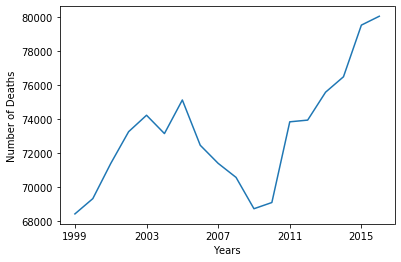

In [87]:
#  Clearly, the "All causes" field is skewing the data heavily towards the right.
#  Group data by location and time period to remove any geographic or temporal bias.

def group(data, cause, state, isAdjusted = False):
    """
    Group data by year, cause, and state
    Defaults to reporting total deaths, but can also report age-adjusted death rate based on isAdjusted
    :data type: DataFrame
    :cause type: string
    :state type: string or list
    :isAdjusted type: boolean
    :return type: list of tuples, (year, deaths or age-adjusted death rate), sorted by year.  If type of state is
                  list, then return multi-dimensional array of tuples (year, deaths or age-adjusted rate)
    """
    year_list = data['Year'].unique()
    deaths_reported = 'Deaths'
    if isAdjusted:
        deaths_reported = "Age-adjusted Death Rate"
      
    if type(state) == str:
        grouped = data.groupby(['Year', 'Cause Name', 'State'])
        result = [(year, grouped.get_group((year, cause, state))[deaths_reported].values[0]) for year in year_list]
        return sorted(result)
    elif type(state) == list:
        count = 0
        number_of_states = len(state)
        result = []
        while count < number_of_states:
            grouped = data.groupby(['Year', 'Cause Name', 'State'])
            temp_result = [(year, grouped.get_group((year, cause, state[count]))[deaths_reported].values[0]) for year in year_list]
            result.append(sorted(temp_result))
            count += 1
        return result

def plot(data, xlabel, ylabel, isMultipleStates = False, isLegend = False):
    """
    Create line plot of data using matplotlib.pyplot
    isMultipleStates is a boolean flag to indicate whether a list of list is being passed for data
    :data type: list of integers
    :xlabel type: string
    :ylabel type: string
    :isMultipleStates: boolean
    :isLegend: boolean
    :return type: none
    """
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    step = 4
    
    if not isMultipleStates:
        x_data_list = [value for year, value in data]
        y_data_list = [year for year, value in data]
    
        plt.plot(y_data_list, x_data_list)
        plt.xticks([year for year in range(min(y_data_list), max(y_data_list), step)])
    else:
        count = 0
        number_of_states = len(states_data)
        while count < number_of_states:
            x_data_list = [value for year, value in states_data[count]]
            y_data_list = [year for year, value in states_data[count]]
            
            plt.plot(y_data_list, x_data_list, label = str(count + 1))
            plt.xticks([year for year in range(min(y_data_list), max(y_data_list), step)])
            count += 1
        if isLegend:
            plt.legend(loc = 'upper left')
        

plot(group(data, "Diabetes", "United States"), "Years", "Number of Deaths")

In [88]:
cause_list = data['Cause Name'].unique()
all_causes_deaths_us = [(cause, group(data, cause, "United States")) for cause in cause_list]
states = data['State'].unique()
states = list(np.delete(states, np.where(states == 'United States')))

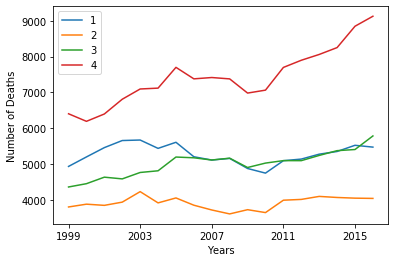

In [89]:
states_data = group(data, "Diabetes", ["Texas", "New York", "Florida", "California"])
plot(states_data, "Years", "Number of Deaths", True, True)

#  It appears that California is driving the increasing incidence of diabetes moreso than other states